# LAB04 - 2D Convolution

## Part 2

Objectives:
- add some padding to an image by using the following modes :zero, replicate, mirror and circular,
- experiment the convolution of an image with a mask,
- apply some basic filters:
    - smoothing,
    - unsharp masking,
    - vertical and horizontal details detection,
- experiment the convolution of an image with a mask with the 2D FFT technique,
- validation of the previous points on *home made* arrays.


## Imported librairies and configurations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import skimage as sk
from scipy import ndimage
from scipy import signal
import scipy.stats as st
from scipy import fftpack

from sys import path
path.append('../tisLib')
from myTisLib import *

## Global parameters for the lab
|parameter|value|description|
|---|---|---|
|NUM_GRAYS| 256| number of gray levels in a gray image|
|MIN_GRAY| 0| minimum value for the gray level (black pixel) |
|MAX_GRAY| 255| maximum value for the gray level (white pixel) |

In [2]:
NUM_GRAYS=256
MIN_GRAY=0
MAX_GRAY=255

# Ex2 - 2D convolution

## Ex2.1 - Function to apply a 2D convolution to an image:

### Function `conv2D`

Prototype: `def conv2D(f,mask, norm=True)`

This function applies the `mask` of 2D convolution to the image `f` and returns the results as an 2D array.
> - `f` is a 256 gray level image
> - `mask` is the 2D convolution mask
> - `norm` is force the normalization of the output in the range [0..255]


In [3]:
def conv2D(_f,_mask, norm=True):
    a = (np.shape(_mask)[0] - 1) // 2
    b = (np.shape(_mask)[1] - 1) // 2

    fp = imagePadding(_f, _mask, _type='zero').astype("float64")
    m, n = np.shape(fp)
    
    g = np.zeros(np.shape(fp))

    for r in range(a, m - a):
        for c in range(b, n - b):
            g[r, c] = np.sum(_mask * fp[r - a : r + a + 1, c - b : c + b + 1])
   
    g = imageUnpadding(g, _mask)
    
    if(norm):
        return imageNormalize(g)
    else:
        return g

## Test of the `conv2D` function

This cell creates an array `f` and apply some `mask` with various sizes.
It compares the two results using the `np.testing.assert_equal` function which generate an error if the test fails.

In [4]:
f=np.array( [
    [0,1,2],
    [3,4,5],
    [6,7,8]] ,dtype='uint8') 
print('f:\n',f)


# ========================================================================
# test with a 1x1 blank mask (no change)
blank_mask=np.zeros( (1,1) , dtype='int8'); 
blank_mask[blank_mask.shape[0]//2,blank_mask.shape[1]//2]=1
print('mask:\n',blank_mask)

g=conv2D(f,blank_mask,norm=False)
print('g:\n',g)
# compare results 
np.testing.assert_equal(f, g)
print("TEST 2D convolution with %dx%d blank mask OK" %(blank_mask.shape[0],blank_mask.shape[1]))


# ========================================================================
# test with a 3x3 blank mask (no change)
blank_mask=np.zeros( (3,3) , dtype='int8'); 
blank_mask[blank_mask.shape[0]//2,blank_mask.shape[1]//2]=1
print('mask:\n',blank_mask)

g=conv2D(f,blank_mask,norm=False)
print('g:\n',g)
# compare results 
np.testing.assert_equal(f, g)
print("TEST 2D convolution with %dx%d blank mask OK" %(blank_mask.shape[0],blank_mask.shape[1]))

# ========================================================================
# test with a 3x7 blank mask (no change)
blank_mask=np.zeros( (3,7) , dtype='int8'); 
blank_mask[blank_mask.shape[0]//2,blank_mask.shape[1]//2]=1
print('mask:\n',blank_mask)

g=conv2D(f,blank_mask,norm=False)
print('g:\n',g)
# compare results 
np.testing.assert_equal(f, g)
print("TEST 2D convolution with %dx%d blank mask OK" %(blank_mask.shape[0],blank_mask.shape[1]))

# ========================================================================
# test with a 7x5 blank mask (no change)
blank_mask=np.zeros( (7,5) , dtype='int8'); 
blank_mask[blank_mask.shape[0]//2,blank_mask.shape[1]//2]=1
print('mask:\n',blank_mask)

g=conv2D(f,blank_mask,norm=False)
print('g:\n',g)
# compare results 
np.testing.assert_equal(f, g)
print("TEST 2D convolution with %dx%d blank mask OK" %(blank_mask.shape[0],blank_mask.shape[1]))

# ========================================================================
# test with a 3x3 mask for sum computation 
mask=np.ones( (3,3) , dtype='int8'); 
print('mask:\n',mask)

g=conv2D(f,mask,norm=False)
print('g:\n',g)

theoreticalG=np.array( [
    [ 8,15,12],
    [21,36,27],
    [20,33,24]] ,dtype='uint8') 

# compare results 
np.testing.assert_equal(theoreticalG, g)
print("TEST 2D convolution with %dx%d sum mask OK" %(blank_mask.shape[0],blank_mask.shape[1]))


f:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
mask:
 [[1]]
g:
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
TEST 2D convolution with 1x1 blank mask OK
mask:
 [[0 0 0]
 [0 1 0]
 [0 0 0]]
g:
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
TEST 2D convolution with 3x3 blank mask OK
mask:
 [[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]]
g:
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
TEST 2D convolution with 3x7 blank mask OK
mask:
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
g:
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
TEST 2D convolution with 7x5 blank mask OK
mask:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
g:
 [[ 8. 15. 12.]
 [21. 36. 27.]
 [20. 33. 24.]]
TEST 2D convolution with 7x5 sum mask OK


## Ex2.2 - Convolution of an image with a smoothing mask 

- `f` is a 11x11 images containing a centered gray [128] square of 5x5,
- `smooth` is a 3x3 matrix [[1,2,1],[2,4,2],[1,2,1]],
- `g` is the result,
- display and save the result as `labo04-ex2.2.png`.


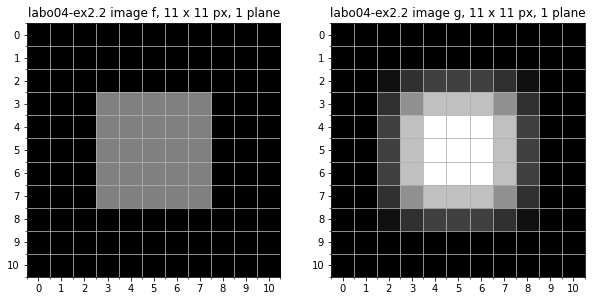

In [5]:
f = np.zeros((11,11), dtype='uint8')
f[3:-3, 3:-3] = 128

smooth = np.array([[1,2,1],[2,4,2],[1,2,1]])
g = conv2D(f,smooth)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
myFancyPlot(f, title="labo04-ex2.2 image f, {0} x {1} px, 1 plane".format(f.shape[0], f.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.subplot(1,2,2)
myFancyPlot(g, title="labo04-ex2.2 image g, {0} x {1} px, 1 plane".format(g.shape[0], g.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.savefig("output/labo04-ex2.2.png", dpi=300, facecolor="white")

## Ex2.3 - Unsharp masking

- `f` is a 11x11 images containing a centered gray [128] square of 5x5,
- `smooth` is a 3x3 matrix 1/6*[[-1,-4,-1],[-4,26,-4],[-1,-4,-1]],
- `g` is the result,
- display and save the result as `labo04-ex2.3.png`.


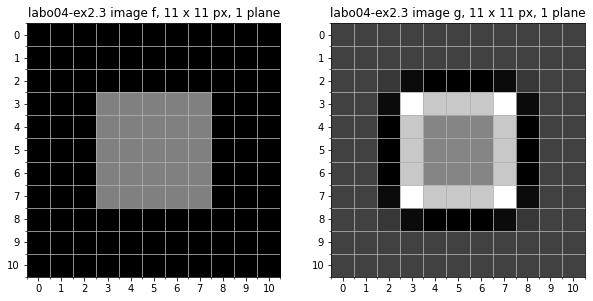

In [6]:
f = np.zeros((11,11), dtype='uint8')
f[3:-3, 3:-3] = 128

smooth = 1 / 6 * np.array([[-1,-4,-1],[-4,26,-4],[-1,-4,-1]])
g = conv2D(f,smooth)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
myFancyPlot(f, title="labo04-ex2.3 image f, {0} x {1} px, 1 plane".format(f.shape[0], f.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.subplot(1,2,2)
myFancyPlot(g, title="labo04-ex2.3 image g, {0} x {1} px, 1 plane".format(g.shape[0], g.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.savefig("output/labo04-ex2.3.png", dpi=300, facecolor="white")

## Ex2.4 - Convolution of an image with a mask for vertical lines detection

- `f` is a 11x11 images containing a centered gray [128] square of 5x5,
- `maskForVerticalDetector` is a 1x3 matrix [[1,-2,1]],
- `g` is the result,
- display and save the result as `labo04-ex2.4.png`.


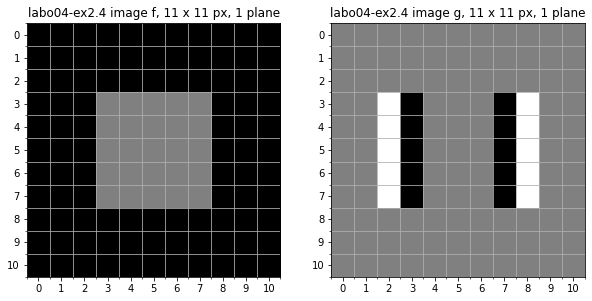

In [7]:
f = np.zeros((11,11), dtype='uint8')
f[3:-3, 3:-3] = 128

maskForVerticalDetector = np.array([[1,-2,1]])
g = conv2D(f,maskForVerticalDetector)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
myFancyPlot(f, title="labo04-ex2.4 image f, {0} x {1} px, 1 plane".format(f.shape[0], f.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.subplot(1,2,2)
myFancyPlot(g, title="labo04-ex2.4 image g, {0} x {1} px, 1 plane".format(g.shape[0], g.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.savefig("output/labo04-ex2.4.png", dpi=300, facecolor="white")

## Ex2.5 - Convolution of an image with a mask for horizontal lines detection

- `f` is a 11x11 images containing a centered gray [128] square of 5x5,
- `maskForHorizontalDetector` is a 3x1 matrix [[1],[-2],[1]],
- `g` is the result,
- display and save the result as `labo04-ex2.5.png`.


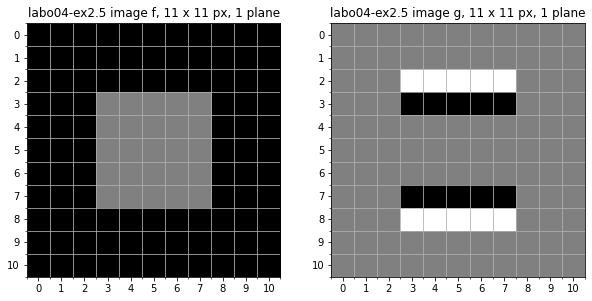

In [8]:
f = np.zeros((11,11), dtype='uint8')
f[3:-3, 3:-3] = 128

maskForHorizontalDetector = np.array([[1,-2,1]]).T
g = conv2D(f, maskForHorizontalDetector)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
myFancyPlot(f, title="labo04-ex2.5 image f, {0} x {1} px, 1 plane".format(f.shape[0], f.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.subplot(1,2,2)
myFancyPlot(g, title="labo04-ex2.5 image g, {0} x {1} px, 1 plane".format(g.shape[0], g.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.savefig("output/labo04-ex2.5.png", dpi=300, facecolor="white")

## Ex 2.6 - Convolution of an image with a mask for vertical and horizontal lines detection

- `f` is a 11x11 images containing a centered gray [128] square of 5x5,
- `hvMask` is a 3x3 matrix [[1,1,1],[1,-8,1],[1,1,1]],
- `g` is the result,
- display and save the result as `labo04-ex2.6.png`.


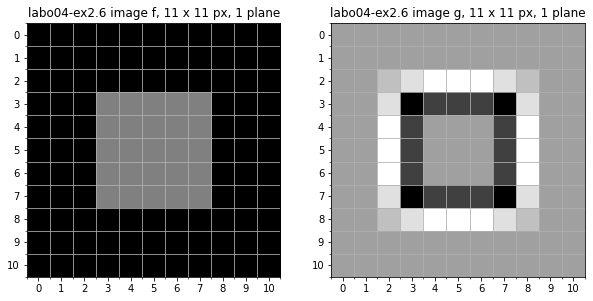

In [9]:
f = np.zeros((11,11), dtype='uint8')
f[3:-3, 3:-3] = 128

hvMask = np.array([[1,1,1],[1,-8,1],[1,1,1]])
g = conv2D(f, hvMask)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
myFancyPlot(f, title="labo04-ex2.6 image f, {0} x {1} px, 1 plane".format(f.shape[0], f.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.subplot(1,2,2)
myFancyPlot(g, title="labo04-ex2.6 image g, {0} x {1} px, 1 plane".format(g.shape[0], g.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.savefig("output/labo04-ex2.6.png", dpi=300, facecolor="white")

## Ex2.7 - Convolution using 2D FFT of an image with a mask for vertical and horizontal lines detection

- `f` is a 11x11 images containing a centered gray [128] square of 5x5,
- `hvMask` is a 3x3 matrix [[1,1,1],[1,-8,1],[1,1,1]],
- `g` is the result,
- display and save the result as `labo04-ex2.7.png`.




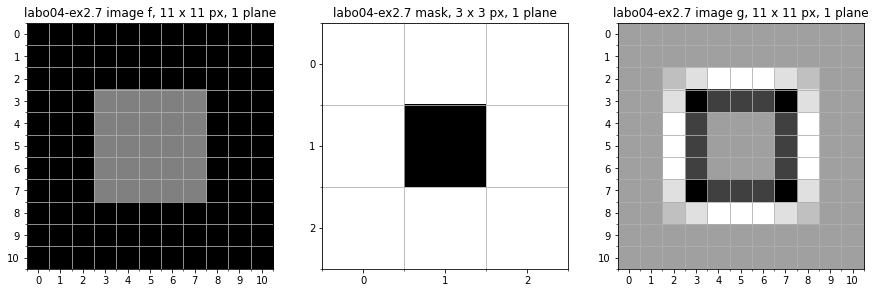

In [10]:
f = np.zeros((11,11), dtype='uint8')
f[3:-3, 3:-3] = 128

hvMask = np.array([[1,1,1],[1,-8,1],[1,1,1]])

p = 2 * f.shape[0]
q = 2 * f.shape[1]

fp = np.zeros((p,q))
fp[:p//2,:q//2] = f

hp = np.zeros((p,q))
hp[:hvMask.shape[0],:hvMask.shape[1]] = hvMask

Fp = np.fft.fft2(fp)
Hp = np.fft.fft2(hp)
G = Fp * Hp
g = np.fft.ifft2(G)
g = g[hvMask.shape[0]//2 : f.shape[0] + hvMask.shape[0]//2, hvMask.shape[1]//2:f.shape[1]+hvMask.shape[1]//2]

g = imageNormalize(np.real(g))  # Remove the imaginary part and normalize


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
myFancyPlot(f, title="labo04-ex2.7 image f, {0} x {1} px, 1 plane".format(f.shape[0], f.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.subplot(1,3,2)
myFancyPlot(imageNormalize(hvMask), title="labo04-ex2.7 mask, {0} x {1} px, 1 plane".format(hvMask.shape[0], hvMask.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.subplot(1,3,3)
myFancyPlot(g, title="labo04-ex2.7 image g, {0} x {1} px, 1 plane".format(g.shape[0], g.shape[1]), cmap="gray", grid=(1,1), ticks=(1,1), newFig=False)
plt.savefig("output/labo04-ex2.7.png", dpi=300, facecolor="white")